In [1]:
!pip install spotipy

In [3]:
!pip install adjustText

In [4]:
# Set up Spotify API credentials
client_id = 'YOUR_CLIENT_ID'  # Replace with your actual Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your actual Client Secret

In [12]:
#Artist Song Popularity

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set up Spotify API credentials
client_id = 'YOUR_CLIENT_ID'  # Replace with your actual Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your actual Client Secret

# Authenticate with Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager, requests_timeout=10)

# Function to fetch albums, singles, and EPs of an artist by name
def get_artist_albums(artist_name):
    # Search for the artist
    result = sp.search(q='artist:' + artist_name, type='artist', limit=1)
    artist = result['artists']['items'][0]
    
    # Get albums, singles, and EPs of the artist
    albums = sp.artist_albums(artist['id'], album_type='album,single,ep', limit=50)
    return albums

# Function to get tracks from an album and their popularity
def get_album_tracks(album_id, album_name):
    all_tracks = []
    tracks = sp.album_tracks(album_id)
    
    for track in tracks['items']:
        # Fetch track details to get popularity
        track_details = sp.track(track['id'])
        
        track_info = {
            'track_name': track['name'],
            'album_name': album_name,
            'popularity': track_details['popularity'],
            'track_uri': track['uri']
        }
        
        all_tracks.append(track_info)
    
    return all_tracks

# Input: Artist name
artist_name = input("Enter the artist's name: ")

# Get albums, singles, and EPs of the artist
albums = get_artist_albums(artist_name)

# List to store all tracks without duplicates
all_tracks = []

# Loop through each album and get tracks
for album in albums['items']:
    album_id = album['id']
    album_name = album['name']
    
    # Get tracks from the album
    tracks = get_album_tracks(album_id, album_name)
    
    # Append the tracks to the all_tracks list
    all_tracks.extend(tracks)

# Create a DataFrame from the list of track info
df = pd.DataFrame(all_tracks)

# Group by track name and keep the one with the highest popularity
df_unique_tracks = df.loc[df.groupby('track_name')['popularity'].idxmax()]

# Sort the DataFrame by popularity in descending order
df_sorted = df_unique_tracks[['track_name', 'popularity']].sort_values(by='popularity', ascending=False)

# Print the DataFrame with only the song title and popularity
print(df_sorted)


Enter the artist's name:  Zach Bryan


                                        track_name  popularity
29   I Remember Everything (feat. Kacey Musgraves)          86
130                                     Pink Skies          85
165                        Something in the Orange          85
184                                  Heading South          83
3                                               28          82
..                                             ...         ...
54       Jamie (with Charles Wesley Godwin) - Live          44
146                                 Starved - demo          43
147                    Starved - Live from Detroit          42
101                               Anita - Part Two           0
108                                      Elisabeth           0

[155 rows x 2 columns]


In [14]:
#Artist popularity comparison

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set up Spotify API credentials
client_id = 'YOUR_CLIENT_ID'  # Replace with your actual Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your actual Client Secret

# Authenticate with Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager, requests_timeout=10)

# Function to fetch albums of an artist by name
def get_artist_albums(artist_name):
    # Search for the artist
    result = sp.search(q='artist:' + artist_name, type='artist', limit=1)
    artist = result['artists']['items'][0]
    
    # Get albums, singles, and EPs of the artist
    albums = sp.artist_albums(artist['id'], album_type='album,single', limit=50)  # Fixed limit to 50
    return albums

# Function to get tracks from an album and their popularity
def get_album_tracks(album_id, album_name):
    all_tracks = []
    tracks = sp.album_tracks(album_id)
    
    for track in tracks['items']:
        # Fetch track details to get popularity
        track_details = sp.track(track['id'])
        
        track_info = {
            'track_name': track['name'],
            'album_name': album_name,
            'popularity': track_details['popularity'],  # Fetch popularity
            'track_uri': track['uri']
        }
        
        all_tracks.append(track_info)
    
    return all_tracks

# Input: List of two artist names
artist_names = [input("Enter the first artist's name: "), input("Enter the second artist's name: ")]

# Iterate through the list of artist names
for artist_name in artist_names:
    print(f"\nTop Songs for {artist_name} by Popularity:")
    
    # Get albums, singles, and EPs of the artist
    albums = get_artist_albums(artist_name)

    # List to store all tracks without duplicates
    all_tracks = []

    # Loop through each album and get tracks
    for album in albums['items']:
        album_id = album['id']
        album_name = album['name']
        
        # Get tracks from the album
        tracks = get_album_tracks(album_id, album_name)
        
        # Append the tracks to the all_tracks list
        all_tracks.extend(tracks)

    # Create a DataFrame from the list of track info
    df = pd.DataFrame(all_tracks)

    # Group by track name and keep the one with the highest popularity
    df_unique_tracks = df.loc[df.groupby('track_name')['popularity'].idxmax()]

    # Create a DataFrame with just the track name and popularity
    df_tracks = pd.DataFrame(df_unique_tracks, columns=['track_name', 'popularity'])

    # Sort the DataFrame by popularity in descending order
    df_sorted = df_tracks.sort_values(by='popularity', ascending=False).head(10)

    # Calculate mean, median, and mode of song popularities
    mean_popularity = df_tracks['popularity'].mean()
    median_popularity = df_tracks['popularity'].median()
    mode_popularity = df_tracks['popularity'].mode()[0]

    # Print the DataFrame with only the song title and popularity
    print(df_sorted[['track_name', 'popularity']])

    # Print mean, median, and mode
    print(f"\nMean Popularity: {mean_popularity}")
    print(f"Median Popularity: {median_popularity}")
    print(f"Mode Popularity: {mode_popularity}")

    print("\n" + "-"*50)


Enter the first artist's name:  Zach Top
Enter the second artist's name:  Zach Bryan



Top Songs for Zach Top by Popularity:
                   track_name  popularity
10                I Never Lie          78
7                    Bad Luck          72
0       Sounds Like the Radio          70
8                      Use Me          67
1   Cold Beer & Country Music          65
4          Dirt Turns to Gold          65
20         Beer For Breakfast          64
2          Cowboys Like Me Do          64
3             There's the Sun          63
5      The Kinda Woman I Like          60

Mean Popularity: 54.86206896551724
Median Popularity: 56.0
Mode Popularity: 52

--------------------------------------------------

Top Songs for Zach Bryan by Popularity:
                                        track_name  popularity
29   I Remember Everything (feat. Kacey Musgraves)          86
130                                     Pink Skies          85
165                        Something in the Orange          85
184                                  Heading South          83
3          

In [ ]:
#Graph of artists popularity of songs in chronological Order (Just Albums)

import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from adjustText import adjust_text

# Set up Spotify API credentials
client_id = 'YOUR_CLIENT_ID'  # Replace with your actual Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your actual Client Secret

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Enter the artist name
artist_name = input("Enter the artist's name: ")

# Search for the artist
results = sp.search(q=f'artist:{artist_name}', type='artist')
artist = results['artists']['items'][0]
artist_id = artist['id']

# Retrieve all albums for the artist
albums = sp.artist_albums(artist_id, album_type='album, single, ep', country="US")['items']
all_tracks = []

# Collect tracks and popularity along with release date
for album in albums:
    album_name = album['name']
    release_date = album['release_date']  # Album's release date
    
    # Retrieve tracks for each album
    tracks = sp.album_tracks(album['id'])['items']
    
    for track in tracks:
        track_info = {
            'track_name': track['name'],
            'popularity': sp.track(track['id'])['popularity'],
            'release_date': release_date,
            'album_name': album_name
        }
        all_tracks.append(track_info)

# Convert to DataFrame for easier handling
df = pd.DataFrame(all_tracks)

# Sort by release date and reset the index for chronological order
df = df.sort_values(by='release_date').reset_index(drop=True)
df['track_number'] = df.index + 1  # Assign track numbers in chronological order

# Assign a unique color to each album
unique_albums = df['album_name'].unique()
palette = sns.color_palette("husl", len(unique_albums))  # Generate unique colors
album_colors = dict(zip(unique_albums, palette))

# Plot popularity by track number (in chronological order), color-coded by album
plt.figure(figsize=(12, 6))
for album in unique_albums:
    album_df = df[df['album_name'] == album]
    plt.plot(album_df['track_number'], album_df['popularity'], marker='o', 
             color=album_colors[album], label=album)
    
# List to store text annotations for adjustText
annotations = []

# Add annotations for local maxima in each album
for album in unique_albums:
    album_df = df[df['album_name'] == album]
    max_popularity_row = album_df.loc[album_df['popularity'].idxmax()]

    # Create annotation and add to list
    annotation = plt.text(
        max_popularity_row['track_number'], max_popularity_row['popularity'],
        f"{max_popularity_row['track_name']} ({max_popularity_row['popularity']})",
        ha='center', va='bottom', color=album_colors[album],
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white")
    )
    annotations.append(annotation)

# Adjust text positions to prevent overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Track Number (Chronological Order)')
plt.ylabel('Popularity')
plt.title(f'Song Popularity in Chronological Order for {artist_name}')
plt.legend(title='Album', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Enter the artist's name:  Morgan Wallen


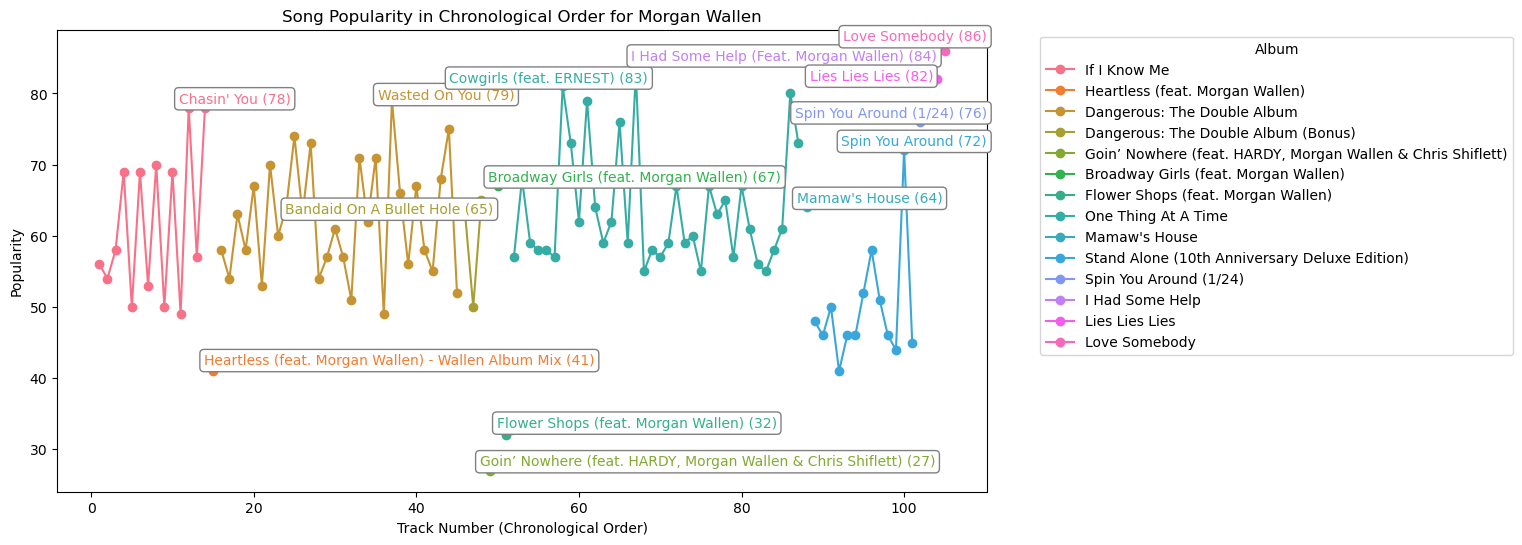

In [32]:
# Graph of artists popularity of songs in chronological Order (Albums, Singles)

import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from adjustText import adjust_text

# Set up Spotify API credentials
client_id = 'YOUR_CLIENT_ID'  # Replace with your actual Client ID
client_secret = 'YOUR_CLIENT_SECRET'  # Replace with your actual Client Secret

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Enter the artist name
artist_name = input("Enter the artist's name: ")

# Search for the artist
results = sp.search(q=f'artist:{artist_name}', type='artist')
artist = results['artists']['items'][0]
artist_id = artist['id']

# Retrieve all albums, singles, and EPs for the artist
albums = sp.artist_albums(artist_id, album_type='album', country="US")['items']
singles = sp.artist_albums(artist_id, album_type='single', country="US")['items']
eps = sp.artist_albums(artist_id, album_type='ep', country="US")['items']

# Combine all into a single list
albums = albums + singles + eps

all_tracks = []

# Collect tracks and popularity along with release date
for album in albums:
    album_name = album['name']
    release_date = album['release_date']  # Album's release date
    
    # Retrieve tracks for each album
    tracks = sp.album_tracks(album['id'])['items']
    
    for track in tracks:
        track_info = {
            'track_name': track['name'],
            'popularity': sp.track(track['id'])['popularity'],
            'release_date': release_date,
            'album_name': album_name
        }
        all_tracks.append(track_info)

# Convert to DataFrame for easier handling
df = pd.DataFrame(all_tracks)

# Remove duplicate songs, keeping the one with the highest popularity
df = df.sort_values(by=['track_name', 'popularity'], ascending=[True, False])
df = df.drop_duplicates(subset=['track_name'], keep='first')

# Sort by release date and reset the index for chronological order
df = df.sort_values(by='release_date').reset_index(drop=True)
df['track_number'] = df.index + 1  # Assign track numbers in chronological order

# Assign a unique color to each album
unique_albums = df['album_name'].unique()
palette = sns.color_palette("husl", len(unique_albums))  # Generate unique colors
album_colors = dict(zip(unique_albums, palette))

# Plot popularity by track number (in chronological order), color-coded by album
plt.figure(figsize=(12, 6))
for album in unique_albums:
    album_df = df[df['album_name'] == album]
    plt.plot(album_df['track_number'], album_df['popularity'], marker='o', 
             color=album_colors[album], label=album)
    
# List to store text annotations for adjustText
annotations = []

# Add annotations for local maxima in each album
for album in unique_albums:
    album_df = df[df['album_name'] == album]
    max_popularity_row = album_df.loc[album_df['popularity'].idxmax()]

    # Create annotation and add to list
    annotation = plt.text(
        max_popularity_row['track_number'], max_popularity_row['popularity'],
        f"{max_popularity_row['track_name']} ({max_popularity_row['popularity']})",
        ha='center', va='bottom', color=album_colors[album],
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white")
    )
    annotations.append(annotation)

# Adjust text positions to prevent overlap
adjust_text(annotations, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Track Number (Chronological Order)')
plt.ylabel('Popularity')
plt.title(f'Song Popularity in Chronological Order for {artist_name}')
plt.legend(title='Album', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
